In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

Using TensorFlow backend.


In [2]:
path = 'C:\\Users\\tangr\\Desktop\\Image-Classification-using-AlexNet-CNN-Model\\seg_train\\seg_train'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(227,227), class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [3]:
type(train)

keras.preprocessing.image.DirectoryIterator

In [4]:
type(train_datagen)

keras.preprocessing.image.ImageDataGenerator

In [5]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32, 6)
Image Size of first image :  (227, 227, 3)
Output of first image :  (6,)


F:\AnacondaInstall\envs\zukayu\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 1. 0. 0. 0. 0.]')

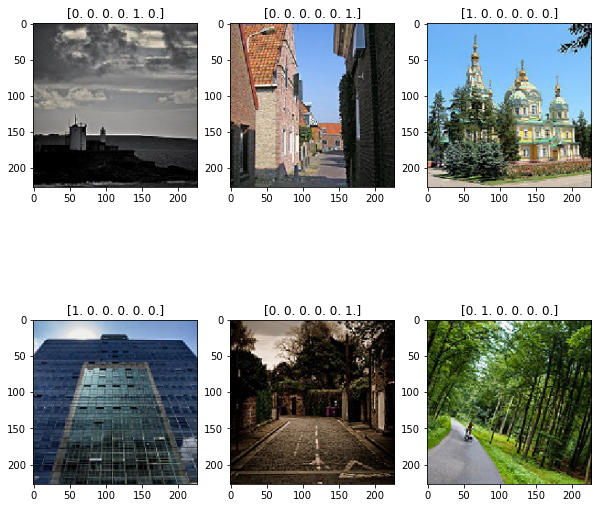

In [6]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))

axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])

axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])

axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])

axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])

axs[1][1].imshow(train[0][0][25])
axs[1][1].set_title(train[0][1][25])

axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

In [7]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(6,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')

    
    return model

In [8]:
alex = AlexNet(train[0][0].shape[1:])

In [9]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 227, 227, 3)       0         
_________________________________________________________________
conv0 (Conv2D)               (None, 55, 55, 96)        34944     
_________________________________________________________________
bn0 (BatchNormalization)     (None, 55, 55, 96)        384       
_________________________________________________________________
activation_1 (Activation)    (None, 55, 55, 96)        0         
_________________________________________________________________
max0 (MaxPooling2D)          (None, 27, 27, 96)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 27, 27, 256)       614656    
_________________________________________________________________
bn1 (BatchNormalization)     (None, 27, 27, 256)       1024

In [10]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [11]:
alex.fit_generator(train,epochs=50)

Epoch 1/50
439/439 [==============================] - 97s 221ms/step - loss: 2.2360 - accuracy: 0.5202
Epoch 2/50
439/439 [==============================] - 96s 218ms/step - loss: 0.9161 - accuracy: 0.6435
Epoch 3/50
439/439 [==============================] - 95s 218ms/step - loss: 0.7678 - accuracy: 0.7178
Epoch 4/50
439/439 [==============================] - 95s 217ms/step - loss: 0.6490 - accuracy: 0.7708
Epoch 5/50
439/439 [==============================] - 95s 217ms/step - loss: 0.6001 - accuracy: 0.7870
Epoch 6/50
439/439 [==============================] - 95s 217ms/step - loss: 0.5580 - accuracy: 0.8006
Epoch 7/50
439/439 [==============================] - 95s 217ms/step - loss: 0.5219 - accuracy: 0.8166
Epoch 8/50
439/439 [==============================] - 95s 217ms/step - loss: 0.4942 - accuracy: 0.8268
Epoch 9/50
439/439 [==============================] - 95s 217ms/step - loss: 0.4805 - accuracy: 0.8336
Epoch 10/50
439/439 [==============================] - 96s 218ms/step - l

In [12]:
path_test = 'C:\\Users\\tangr\\Desktop\\Image-Classification-using-AlexNet-CNN-Model\\seg_test\\seg_test'
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [17]:
preds = alex.evaluate_generator(test)

print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

Loss = 0.1878412961959839
Test Accuracy = 0.871999979019165


In [18]:
path_test = 'C:\\Users\\tangr\\Desktop\\Image-Classification-using-AlexNet-CNN-Model\\seg_pred\\'
predict_datagen = ImageDataGenerator(rescale=1. / 255)
predict = predict_datagen.flow_from_directory(path_test, target_size=(227,227), batch_size = 1,class_mode='categorical')

Found 7301 images belonging to 1 classes.


In [19]:
predictions = alex.predict_generator(predict)

In [20]:
len(predictions)

7301

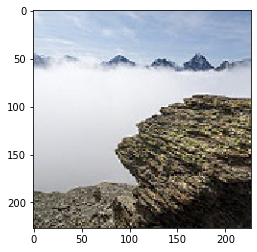

In [44]:
imshow(predict[5300][0][0])
plt.imsave("predicted1.png",predict[5300][0][0])

In [45]:
print(predictions[5300])

[2.6537746e-04 6.4374256e-04 4.5224793e-02 1.2667084e-01 8.2719183e-01
 3.3225565e-06]


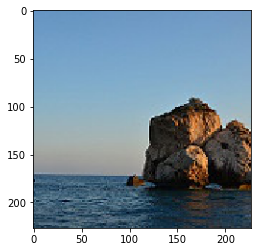

In [23]:
imshow(predict[1300][0][0])

In [24]:
predictions[1300]

array([5.2910016e-12, 1.1768315e-13, 1.3519180e-09, 1.0530314e-09,
       1.0000000e+00, 2.9473104e-14], dtype=float32)

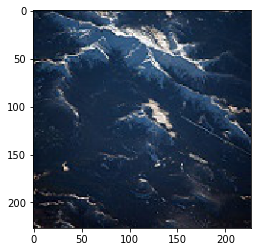

In [25]:
imshow(predict[4400][0][0])

In [26]:
predictions[4400]

array([1.4107786e-04, 7.2401655e-03, 9.0441413e-02, 5.1603377e-01,
       3.8608500e-01, 5.8551897e-05], dtype=float32)

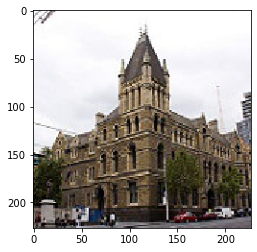

In [46]:
imshow(predict[700][0][0])
plt.imsave("predicted2.png" , predict[700][0][0])

In [47]:
print(predictions[700])

[9.9999893e-01 1.2553875e-08 7.1486659e-07 4.0256100e-07 1.3809868e-08
 8.5458379e-10]


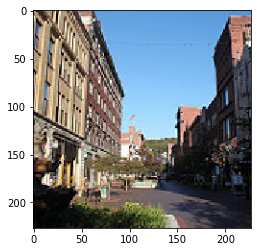

In [29]:
imshow(predict[6500][0][0])

In [30]:
predictions[6500]

array([1.1534187e-01, 1.1149397e-06, 3.4518308e-07, 7.2168582e-08,
       2.6449530e-07, 8.8465625e-01], dtype=float32)

In [41]:
import os 
def get_category(predicted_output):
    path  = "C:\\Users\\tangr\\Desktop\\AaruClassify\\seg_train\\seg_train"
    return os.listdir(path)[np.argmax(predicted_output)] 

In [49]:
print(get_category(predictions[700]))

buildings


Text(0.5, 1.0, 'street')

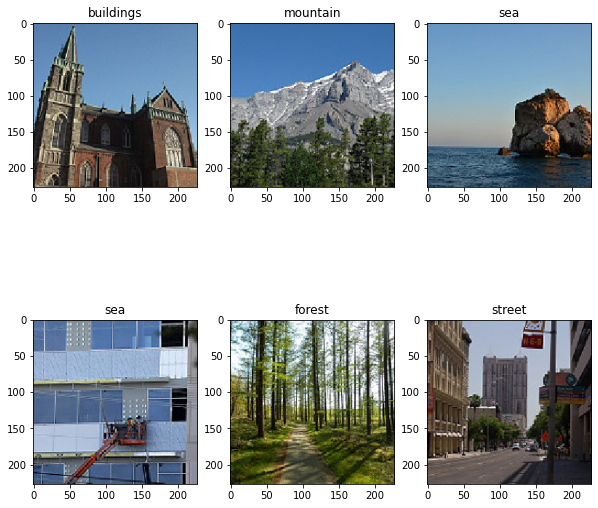

In [92]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))

axs[0][0].imshow(predict[1002][0][0])
axs[0][0].set_title(get_category(predictions[1002]))

axs[0][1].imshow(predict[22][0][0])
axs[0][1].set_title(get_category(predictions[22]))

axs[0][2].imshow(predict[1300][0][0])
axs[0][2].set_title(get_category(predictions[1300]))

axs[1][0].imshow(predict[3300][0][0])
axs[1][0].set_title(get_category(predictions[3300]))

axs[1][1].imshow(predict[7002][0][0])
axs[1][1].set_title(get_category(predictions[7002]))

axs[1][2].imshow(predict[512][0][0])
axs[1][2].set_title(get_category(predictions[512]))